# Network Topology Visualization

Visualize the actual structure of Beijing subway network at different time periods.
This shows how the network evolved from a simple loop to a complex interconnected system.

In [1]:
import sys
sys.path.append('..')

import networkx as nx
import matplotlib.pyplot as plt

from src.subway_model import SubwayGraph

subway = SubwayGraph('../data/beijing_subway_data.csv')
print("Subway data loaded")

Subway data loaded


In [2]:
# Choose key years to visualize
# Using years that show different development stages
years = [1990, 2000, 2008, 2023]

# Build graphs
graphs = {}
for year in years:
    g = subway.build_graph_for_date(str(year))
    graphs[year] = g
    print(f"{year}: {g.number_of_nodes()} stations, {g.number_of_edges()} connections")

1990: 16 stations, 9 connections
2000: 20 stations, 11 connections
2008: 77 stations, 62 connections
2023: 367 stations, 412 connections



Figure saved to ../figures/network_topology_evolution.png


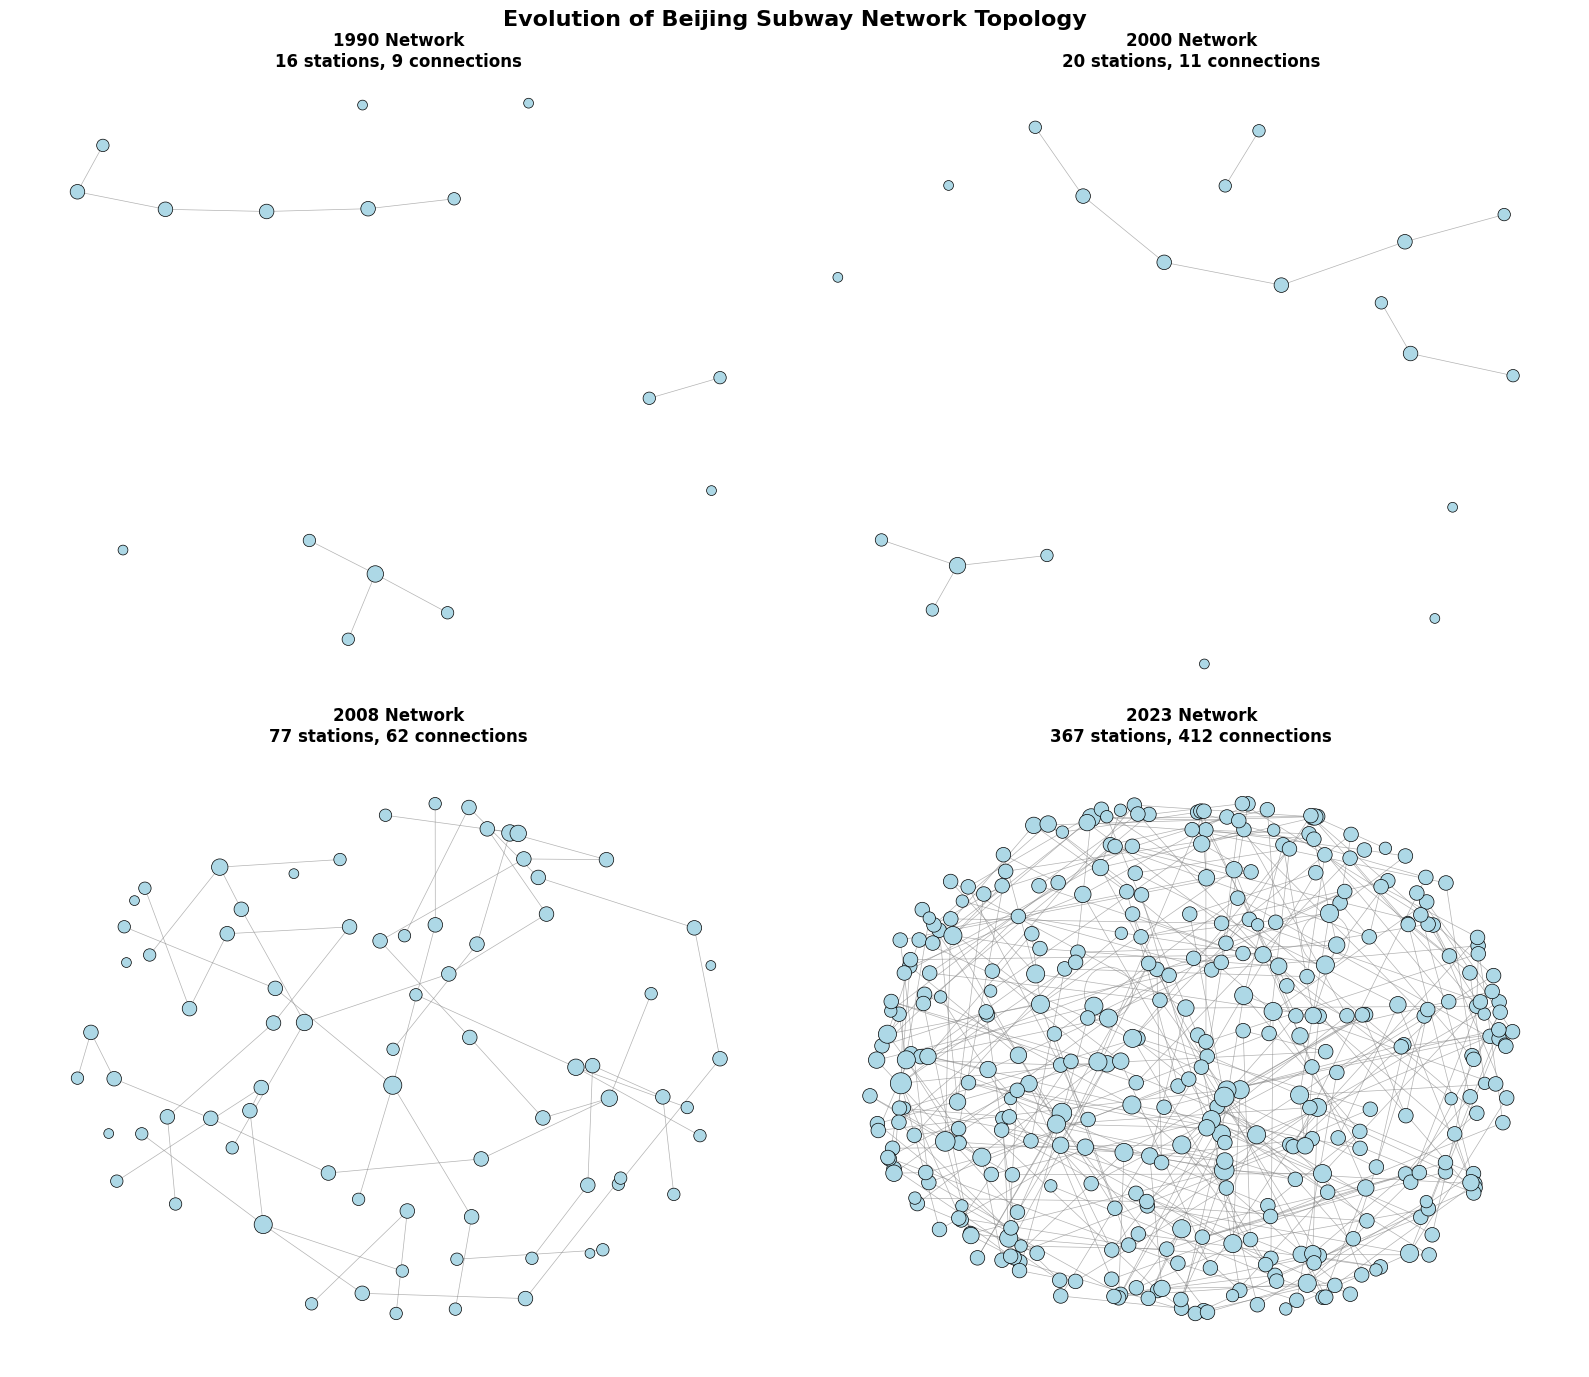

In [3]:
# Create 2x2 subplot for the four years
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, year in enumerate(years):
    ax = axes[idx]
    graph = graphs[year]
    
    # Use spring layout - it naturally shows network structure
    # Set seed for reproducibility but allow some variation
    pos = nx.spring_layout(graph, k=0.5, iterations=50, seed=42+idx)
    
    # Calculate node sizes based on degree
    degrees = dict(graph.degree())
    node_sizes = [degrees[node] * 30 + 50 for node in graph.nodes()]
    
    # Draw the network
    nx.draw_networkx_nodes(graph, pos, 
                          node_size=node_sizes,
                          node_color='lightblue',
                          edgecolors='black',
                          linewidths=0.5,
                          ax=ax)
    
    nx.draw_networkx_edges(graph, pos,
                          width=0.5,
                          alpha=0.6,
                          edge_color='gray',
                          ax=ax)
    
    # Add title with network info
    ax.set_title(f'{year} Network\n{graph.number_of_nodes()} stations, {graph.number_of_edges()} connections',
                fontsize=12, fontweight='bold')
    ax.axis('off')

plt.suptitle('Evolution of Beijing Subway Network Topology', 
            fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Save figure
plt.savefig('../figures/network_topology_evolution.png', dpi=300, bbox_inches='tight')
print("\nFigure saved to ../figures/network_topology_evolution.png")
plt.show()

Detailed comparison saved to ../figures/detailed_network_comparison.png


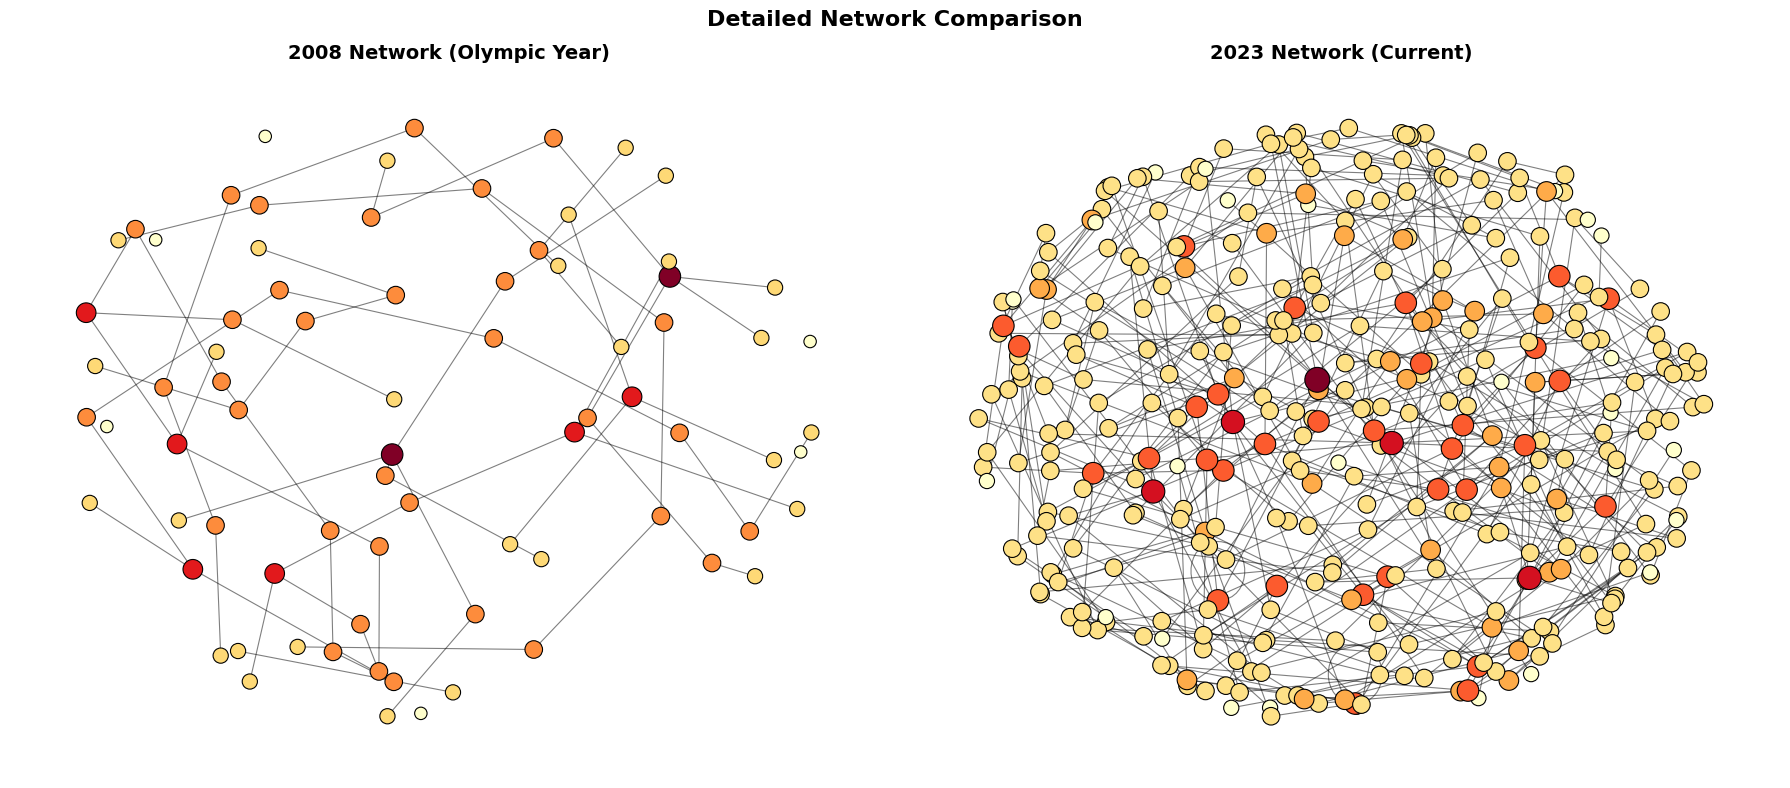

In [4]:
# Create individual detailed plots for key years
# Let's focus on 2008 and 2023 for detailed view

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 2008 detailed view
graph_2008 = graphs[2008]
pos_2008 = nx.spring_layout(graph_2008, k=1, iterations=100, seed=42)

degrees_2008 = dict(graph_2008.degree())
node_sizes_2008 = [degrees_2008[node] * 40 + 80 for node in graph_2008.nodes()]

# Color nodes by degree
node_colors_2008 = [degrees_2008[node] for node in graph_2008.nodes()]

nx.draw_networkx_nodes(graph_2008, pos_2008,
                      node_size=node_sizes_2008,
                      node_color=node_colors_2008,
                      cmap='YlOrRd',
                      edgecolors='black',
                      linewidths=0.8,
                      ax=ax1)

nx.draw_networkx_edges(graph_2008, pos_2008,
                      width=0.8,
                      alpha=0.5,
                      ax=ax1)

ax1.set_title('2008 Network (Olympic Year)', fontsize=14, fontweight='bold')
ax1.axis('off')

# 2023 detailed view
graph_2023 = graphs[2023]
pos_2023 = nx.spring_layout(graph_2023, k=0.8, iterations=100, seed=50)

degrees_2023 = dict(graph_2023.degree())
node_sizes_2023 = [degrees_2023[node] * 40 + 80 for node in graph_2023.nodes()]
node_colors_2023 = [degrees_2023[node] for node in graph_2023.nodes()]

nx.draw_networkx_nodes(graph_2023, pos_2023,
                      node_size=node_sizes_2023,
                      node_color=node_colors_2023,
                      cmap='YlOrRd',
                      edgecolors='black',
                      linewidths=0.8,
                      ax=ax2)

nx.draw_networkx_edges(graph_2023, pos_2023,
                      width=0.8,
                      alpha=0.5,
                      ax=ax2)

ax2.set_title('2023 Network (Current)', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle('Detailed Network Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.savefig('../figures/detailed_network_comparison.png', dpi=300, bbox_inches='tight')
print("Detailed comparison saved to ../figures/detailed_network_comparison.png")
plt.show()

In [5]:
# Some basic analysis of network structure change
print("\nNetwork Evolution Summary:")
print("=" * 50)

for year in years:
    g = graphs[year]
    density = nx.density(g)
    avg_degree = sum(dict(g.degree()).values()) / g.number_of_nodes()
    
    print(f"\n{year}:")
    print(f"  Nodes: {g.number_of_nodes()}")
    print(f"  Edges: {g.number_of_edges()}")
    print(f"  Density: {density:.4f}")
    print(f"  Avg degree: {avg_degree:.2f}")
    
    # Check if connected
    if nx.is_connected(g):
        print(f"  Status: Fully connected")
    else:
        components = list(nx.connected_components(g))
        print(f"  Status: {len(components)} components")


Network Evolution Summary:

1990:
  Nodes: 16
  Edges: 9
  Density: 0.0750
  Avg degree: 1.12
  Status: 7 components

2000:
  Nodes: 20
  Edges: 11
  Density: 0.0579
  Avg degree: 1.10
  Status: 9 components

2008:
  Nodes: 77
  Edges: 62
  Density: 0.0212
  Avg degree: 1.61
  Status: 15 components

2023:
  Nodes: 367
  Edges: 412
  Density: 0.0061
  Avg degree: 2.25
  Status: Fully connected
